In [6]:
#import modules
from sklearn.datasets import load_breast_cancer
import pandas as pd
import requests
from pandas.io.json import json_normalize 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib

#input
nfldata = pd.read_csv("WEEK_1_INPUT.csv") 

#identify features
feature_cols = ['Distance', 'Down' ,'QuarterName', 
                'Sequence', 'TimeRemainingMinutes','TimeRemainingSeconds',
                'YardLine','YardsGained', 'YardsToEndZone']

#create harness for features
X = nfldata.loc[:, feature_cols]

#create harness for target
Y = nfldata.target

#fit harness
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=30)

#create classifier
nfldata_clf = LogisticRegression()

#fit classfier
nfldata_clf.fit(X_trainN, y_trainN)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [4]:
#predict on test and print probability
probac = nfldata_clf.predict_proba(X_testN)
print probac

[[0.53132868 0.46867132]
 [0.45861451 0.54138549]
 [0.46150607 0.53849393]
 ...
 [0.50762871 0.49237129]
 [0.42244124 0.57755876]
 [0.58426395 0.41573605]]


In [5]:
#print prediction value
predict = nfldata_clf.predict(X_testN)
print predict 

[0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0
 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 1 0 1 

In [6]:
#slice to probability values associated with winning game
probability = probac[:,1]
prob_df = pd.DataFrame(probability)
print prob_df.head(10) # this should match the probac 1st column 

          0
0  0.468671
1  0.541385
2  0.538494
3  0.543363
4  0.472090
5  0.473771
6  0.410256
7  0.404451
8  0.425397
9  0.476866


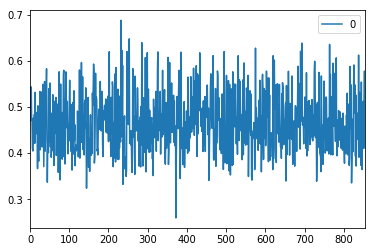

In [8]:
#graph predicitions
lines = prob_df.plot.line()

In [8]:
##working demo

#request to get results from specific game
res = requests.get("https://api.sportsdata.io/v3/nfl/pbp/json/PlayByPlay/2019REG/3/NYG?key=1f1d70692bf443f2bb64f367f0a14ff1").json()

#normalize json results to dataframe structure
df = json_normalize(res, 'Plays')

#isolate features used in model
NYGW3 = df[['Distance', 'Down' ,'QuarterName', 
                'Sequence', 'TimeRemainingMinutes','TimeRemainingSeconds',
                'YardLine','YardsGained', 'YardsToEndZone']].copy()

#predict using defined classifier
probac1 = nfldata_clf.predict_proba(NYGW3)
print(probac1)

[[0.59564892 0.40435108]
 [0.57841078 0.42158922]
 [0.51152153 0.48847847]
 [0.55134618 0.44865382]
 [0.52414429 0.47585571]
 [0.48374223 0.51625777]
 [0.46810854 0.53189146]
 [0.48828557 0.51171443]
 [0.47761711 0.52238289]
 [0.47236186 0.52763814]
 [0.42620044 0.57379956]
 [0.41615348 0.58384652]
 [0.52474775 0.47525225]
 [0.55204107 0.44795893]
 [0.55742253 0.44257747]
 [0.55126723 0.44873277]
 [0.49092635 0.50907365]
 [0.50201268 0.49798732]
 [0.48358198 0.51641802]
 [0.47548123 0.52451877]
 [0.48713239 0.51286761]
 [0.47753114 0.52246886]
 [0.47620967 0.52379033]
 [0.48190249 0.51809751]
 [0.431784   0.568216  ]
 [0.59419203 0.40580797]
 [0.51603295 0.48396705]
 [0.49840771 0.50159229]
 [0.48953981 0.51046019]
 [0.48439742 0.51560258]
 [0.49305951 0.50694049]
 [0.44782788 0.55217212]
 [0.44022406 0.55977594]
 [0.44044218 0.55955782]
 [0.43745651 0.56254349]
 [0.54640725 0.45359275]
 [0.60565501 0.39434499]
 [0.61399559 0.38600441]
 [0.56114992 0.43885008]
 [0.51049218 0.48950782]


In [9]:
#isolate values associated to winning game
probability1 = probac1[:,1]
prob_df1 = pd.DataFrame(probability1)
print prob_df1.head(10)

          0
0  0.404351
1  0.421589
2  0.488478
3  0.448654
4  0.475856
5  0.516258
6  0.531891
7  0.511714
8  0.522383
9  0.527638


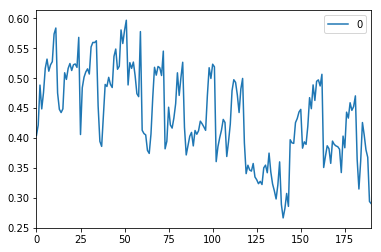

In [11]:
#plot
lines = prob_df1.plot.line()

In [ ]:
##solve for changes of posession 
##solve for streaming data 
##are end games in progress?
##current week?
##current season and season type?
##consensus odds 